In [101]:
import pandas as pd
import numpy as np
import io
from google.colab import files
uploader = files.upload()


Saving crime_data.csv to crime_data (4).csv


In [102]:
df = pd.read_csv(io.BytesIO(uploader['crime_data (4).csv']))
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [103]:
# taille du fichier
df.shape

(499, 13)

In [104]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     472 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [105]:
# type des donnees
df.dtypes


,0
DR_NO,int64
Date_Rptd,object
DATE_OCC,object
AREA_NAME,object
Crm_Cd,int64
Crm_Cd_Desc,object
Vict_Age,int64
Vict_Sex,object
Premis_Desc,object
Status,object


In [106]:
# valeurs uniques des colonnes specifiques
df.nunique()

,0
DR_NO,499
Date_Rptd,68
DATE_OCC,61
AREA_NAME,19
Crm_Cd,42
Crm_Cd_Desc,42
Vict_Age,66
Vict_Sex,3
Premis_Desc,67
Status,4


Identifions les différents codes criminels et leurs descriptions

In [107]:
# Identifier les différents codes criminels et leurs descriptions
cri_code = [ "Crm_Cd", "Crm_Cd_Desc" ]
distinct_crim_cod = df[cri_code].drop_duplicates()
print(distinct_crim_cod)


     Crm_Cd                                        Crm_Cd_Desc
0       624                           BATTERY - SIMPLE ASSAULT
2       745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3       740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
4       442           SHOPLIFTING - PETTY THEFT ($950 & UNDER)
5       946                          OTHER MISCELLANEOUS CRIME
6       341  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
7       330                              BURGLARY FROM VEHICLE
8       930             CRIMINAL THREATS - NO WEAPON DISPLAYED
10      648                                              ARSON
12      354                                  THEFT OF IDENTITY
14      230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
17      761                                    BRANDISH WEAPON
19      350                                      THEFT, PERSON
22      310                                           BURGLARY
25      480                                      BIKE -

**Analyse temporelle :**

     - Analysons les aspects temporels des données.
     - Déterminons les tendances de la criminalité dans le temps

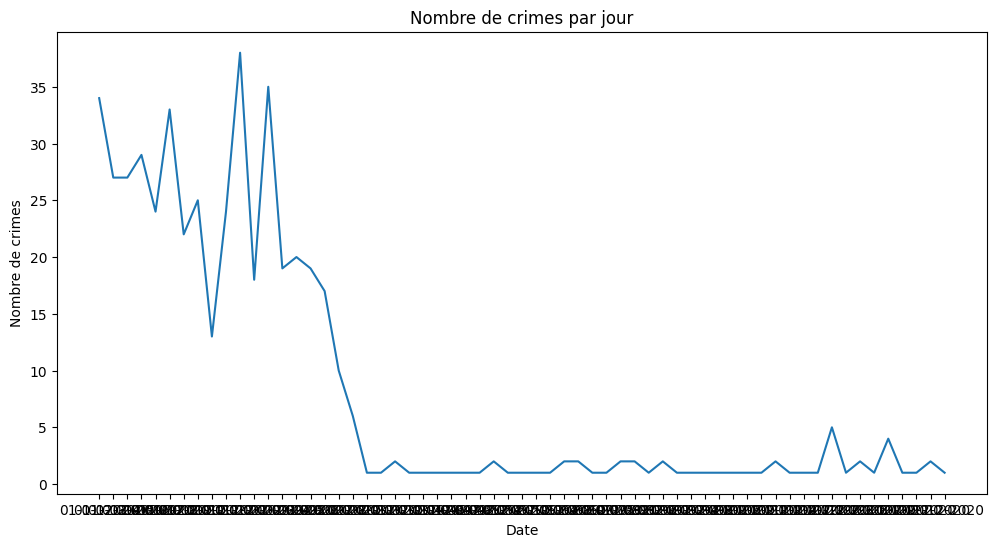

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
daily_crim_per_day = df.groupby('DATE_OCC').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_crim_per_day.index, y=daily_crim_per_day.values)
plt.title('Nombre de crimes par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de crimes')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

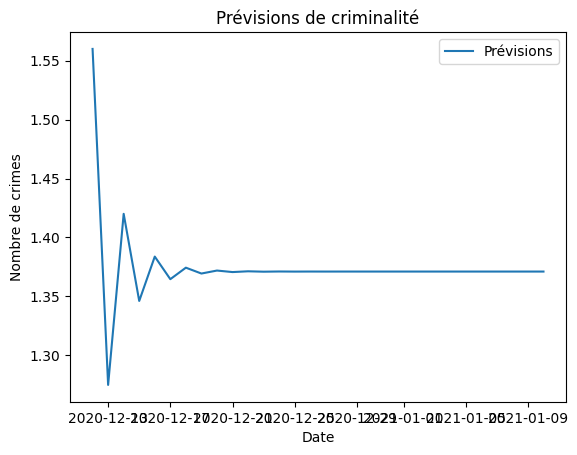

In [109]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd


# En supposant que daily_crim_per_day est une série Pandas avec un DatetimeIndex
model = ARIMA(daily_crim_per_day, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Générons une plage de dates avec des informations sur le fuseau horaire
future_dates = pd.date_range(start=daily_crim_per_day.index[-1], periods=30, tz='UTC')

# Tracons les prévisions avec une plage de dates tenant compte du fuseau horaire
plt.plot(future_dates, forecast, label='Prévisions') #Utiliser future_dates avec le fuseau horaire
plt.title('Prévisions de criminalité')
plt.xlabel('Date')
plt.ylabel('Nombre de crimes')
plt.legend()
plt.show()



In [110]:
Nbre_crime = df['Crm_Cd'].value_counts()
print(Nbre_crime)


Crm_Cd
330    82
624    74
440    44
442    28
510    28
341    26
230    24
740    23
745    23
888    19
310    16
210    12
480    11
354    10
420     9
350     9
930     7
623     5
761     5
662     5
946     4
220     4
648     3
901     3
850     2
956     2
351     2
320     2
625     2
886     2
900     2
755     1
649     1
940     1
647     1
890     1
421     1
820     1
812     1
920     1
666     1
343     1
Name: count, dtype: int64


0     2020-01-08
1     2020-01-01
2     2020-01-01
3     2020-01-01
4     2020-01-02
         ...    
494   2020-02-07
495   2020-02-07
496   2020-02-07
497   2020-01-10
498   2020-02-03
Name: DATE_OCC, Length: 499, dtype: datetime64[ns]
   annee  Nombre_Crime
0   2020        251585


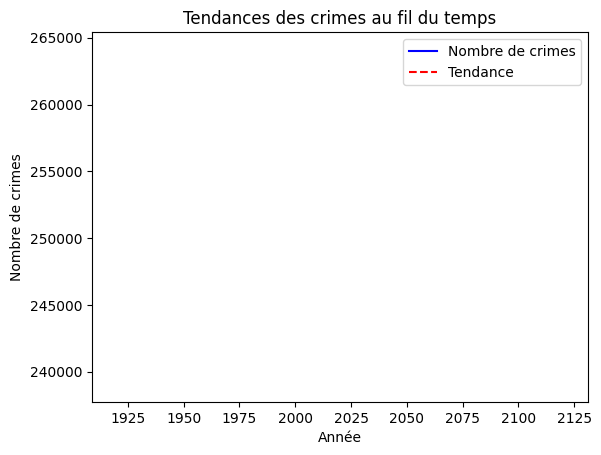

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Conversion de la colonne 'DATE_OCC' en datetime
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])
print(df['DATE_OCC'])

# on extrait l'année et on groupe par année pour compter le nombre de crimes
crime_grouped = df.groupby(df['DATE_OCC'].dt.year)['Crm_Cd'].sum().reset_index(name='Nombre_Crime')
# Renommons la colonne des années
crime_grouped.rename(columns={'DATE_OCC': 'annee'}, inplace=True)
print(crime_grouped)

# Convertissons les années en une matrice 2D
annees = np.array(crime_grouped['annee']).reshape(-1, 1)
nombre_crimes = np.array(crime_grouped['Nombre_Crime'])

#appliquons la regression lineaire
model = LinearRegression()
model.fit(annees, nombre_crimes)

# Prédire les valeurs
tendances = model.predict(annees)

#visualisation
plt.plot(annees, nombre_crimes, label='Nombre de crimes', color='blue')
plt.plot(annees, tendances, label='Tendance', color='red', linestyle='--')
plt.title('Tendances des crimes au fil du temps')
plt.xlabel('Année')
plt.ylabel('Nombre de crimes')
plt.legend()
plt.show()

Utiliser une régression linéaire pour observer la tendance :

   annee  Nombre_Crime
0   2020        251585
(1, 1)
(1,)


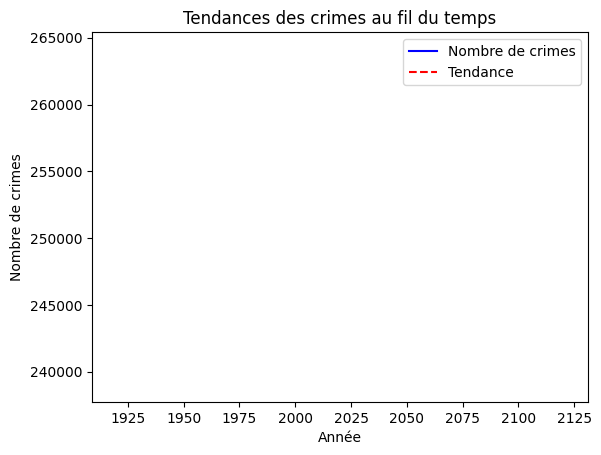

In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Exemple d'une DataFrame avec des dates et le nombre de crimes


# Conversion de la colonne 'DATE_OCC' en datetime
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])

# Extraire l'année et grouper par année pour compter le nombre de crimes
crime_grouped = df.groupby(df['DATE_OCC'].dt.year)['Crm_Cd'].sum().reset_index(name='Nombre_Crime')

# Renommer la colonne des années
crime_grouped.rename(columns={'DATE_OCC': 'annee'}, inplace=True)
#print(crime_grouped)

# Convertir les années en une matrice 2D
annees = np.array(crime_grouped['annee']).reshape(-1, 1)
nombre_crimes = np.array(crime_grouped['Nombre_Crime'])



print(crime_grouped.head())  # Vérifier les premières lignes
print(annees.shape)  # Vérifier la forme des années
print(nombre_crimes.shape)  # Vérifier la forme du nombre de crimes

# Appliquer la régression linéaire
model = LinearRegression()
model.fit(annees, nombre_crimes)

# Prédire les valeurs
tendances = model.predict(annees)

# Visualisation
plt.plot(annees, nombre_crimes, label='Nombre de crimes', color='blue')
plt.plot(annees, tendances, label='Tendance', color='red', linestyle='--')
plt.title('Tendances des crimes au fil du temps')
plt.xlabel('Année')
plt.ylabel('Nombre de crimes')
plt.legend()
plt.show()

#### 5. Analyse spatiale
  - Utilisons les informations géographiques (latitude et longitude) pour effectuer une analyse spatiale

In [117]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium

#Convert latitudes and longitudes into geometric objects usable with GeoPandas.

#create the Geodataframe
geometry = [Point(xy) for xy in zip(df["LAT"], df["LON"])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

#define the systeme of coordonnee (WGS84)
geo_df.crs={'init': 'epsg:4326'}

#show the point on the static card
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax)
geo_df.plot(ax=ax, color='red', markersize=50)
plt.title('point interess on the card')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [35]:
!pip install --quiet geopandas

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from shapely.geometry import point


#Convertissons les latitudes et les longitudes en objets géométriques utilisables avec GeoPandas.
#Créons le Geodataframe
geometry = [point.Point(xy) for xy in zip(df.LON, df.LAT)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

#Définissons le système de coordonnées (WGS84)
gdf.crs = {'init': 'epsg:4326'}

#affichons le point sur la carte statique

!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip
!ls ne_110m_admin_0_countries  # Vérification des fichiers extraits
 # telechargeon le fichier de forme
#!unzip ne_110m_admin_0_countries.zip # decompressons le fichier

#!ls -local

# depuis 'naturalearth_lowres' n'est plus disponible dans geopandas,
# lire le fichier de forme telecarger a la place
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp") # lire le fichier telecharger dans les etapes precedantes

print(world.head())




fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, color='red', markersize=50)
plt.title('point d\'interet sur la carte')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


--2024-10-03 17:52:54--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2024-10-03 17:52:55 ERROR 500: Internal Server Error.

unzip:  cannot find or open ne_110m_admin_0_countries.zip, ne_110m_admin_0_countries.zip.zip or ne_110m_admin_0_countries.zip.ZIP.
ls: cannot access 'ne_110m_admin_0_countries': No such file or directory


DataSourceError: ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp: No such file or directory

In [122]:
import folium
import pandas as pd
from folium.plugins import HeatMap
# Center the card on mean coordonnee


map_center = [df['LAT'].mean(), df['LON'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Add the HeatMap
heat_data = [[row['LAT'], row['LON']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# save the card in the file HTML
m.save("crime_heatmap.html")
m

### 6. Données démographiques sur les victimes
    Étude de la répartition des âges et des sexes des victimes

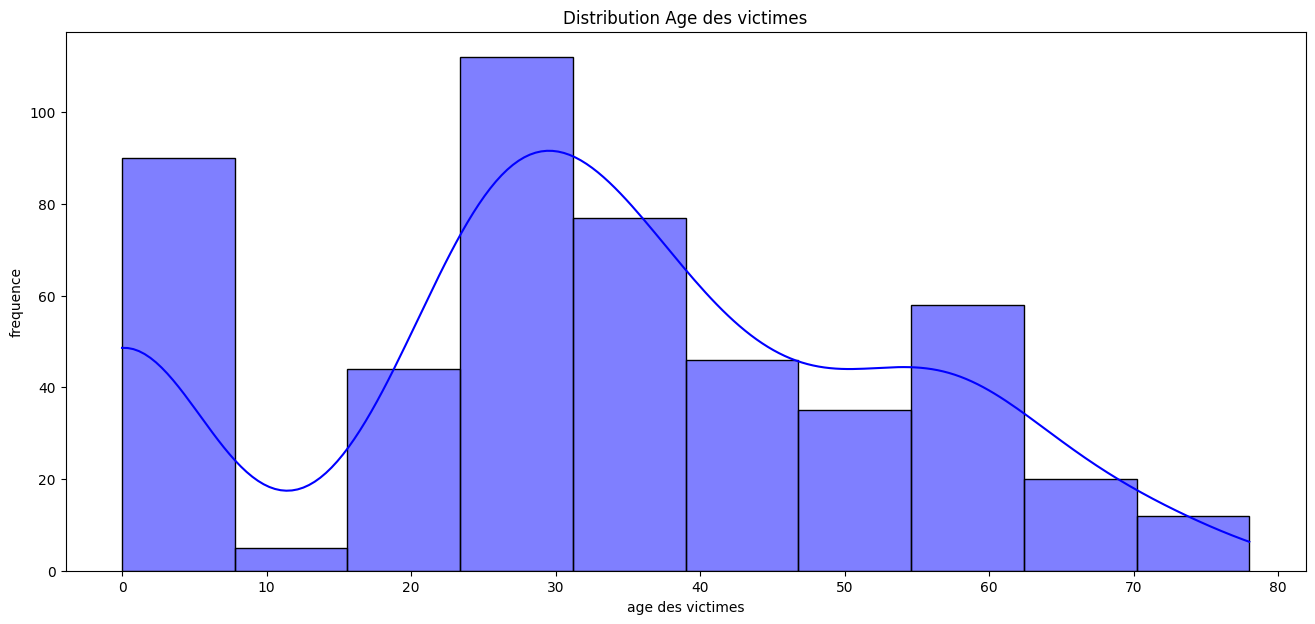

In [125]:
# repartition des ages des victimes
plt.figure(figsize=(16, 7))
sns.histplot(df['Vict_Age'], bins=10, kde=True, color='blue')
plt.title('Distribution Age des victimes')
plt.xlabel('age des victimes')
plt.ylabel('frequence')
plt.show()

<ipython-input-127-0429b07f746a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vict_Sex', data=df, palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 li

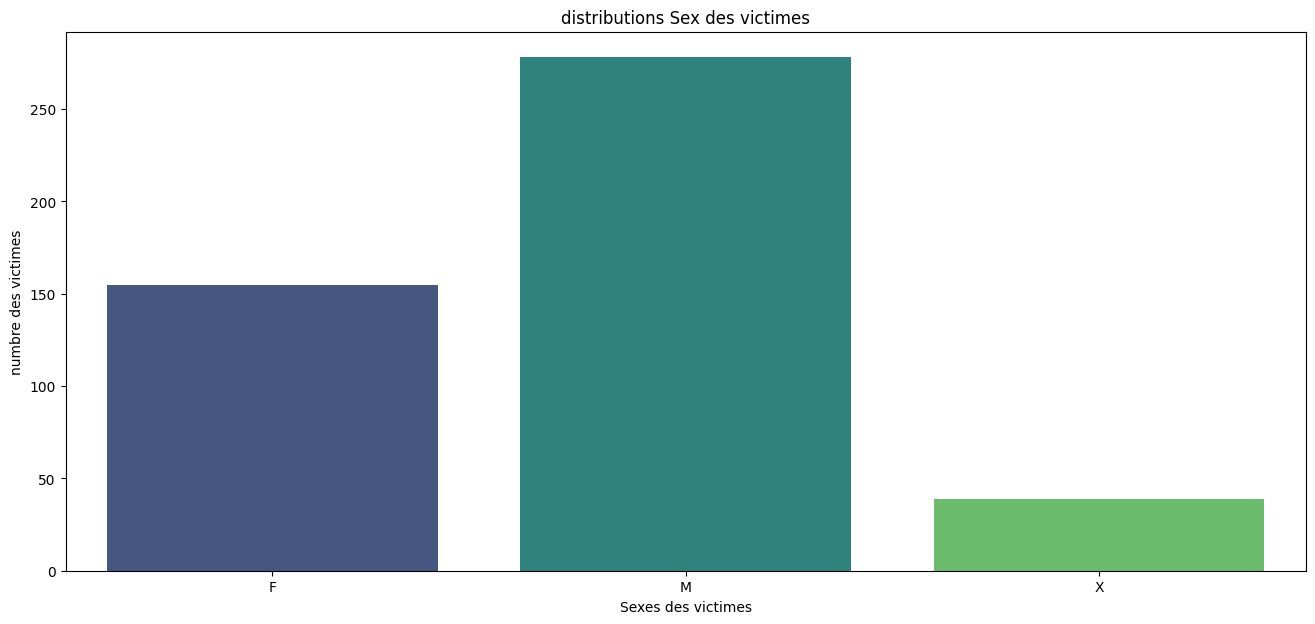

In [127]:
#distribution sexe des victimes
plt.figure(figsize=(16, 7))
sns.countplot(x='Vict_Sex', data=df, palette = 'viridis')
plt.title('distributions Sex des victimes')
plt.xlabel('Sexes des victimes')
plt.ylabel('numbre des victimes')
plt.show()

<ipython-input-129-c30542e6ac4b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vict_Sex', y='Vict_Age', data=df, palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_grou

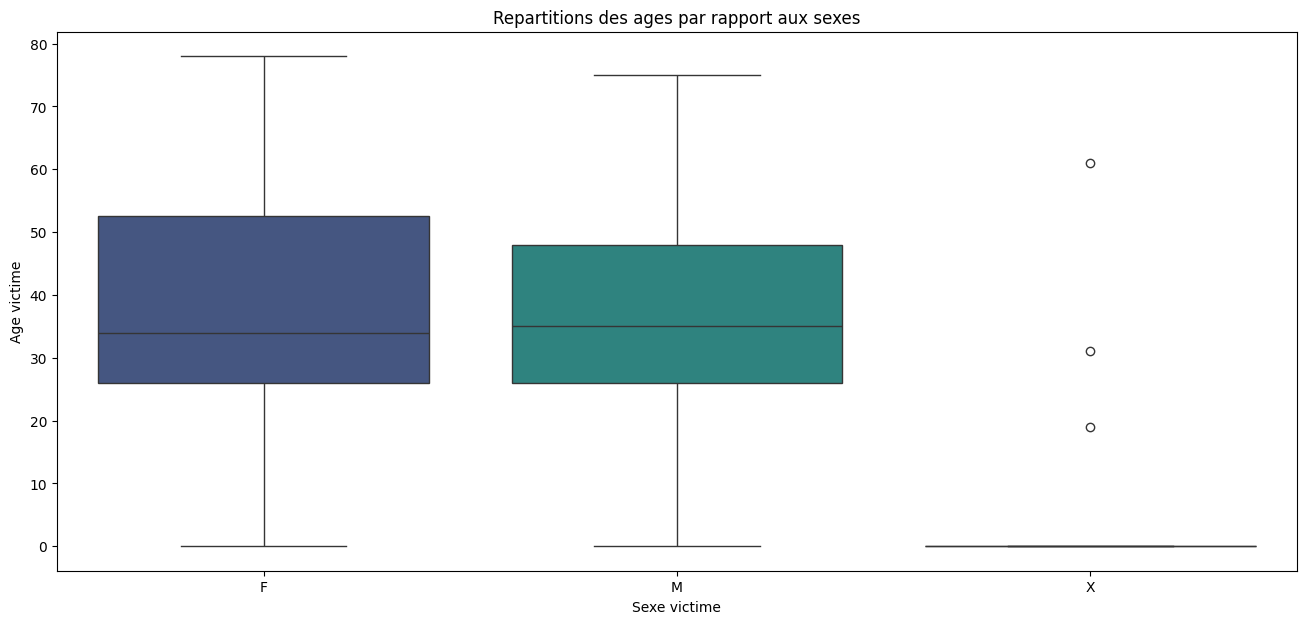

In [129]:
#Repartitions des ages par rapport aux sexes
plt.figure(figsize=(16, 7))
sns.boxplot(x='Vict_Sex', y='Vict_Age', data=df, palette = 'viridis')
plt.title('Repartitions des ages par rapport aux sexes')
plt.xlabel('Sexe victime')
plt.ylabel('Age victime')
plt.show()

Premis_Desc
STREET                                          105
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
                                               ... 
MINI-MART                                         1
SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS      1
MEDICAL/DENTAL OFFICES                            1
DETENTION/JAIL FACILITY                           1
MTA PROPERTY OR PARKING LOT                       1
Name: count, Length: 67, dtype: int64


<ipython-input-130-5f43402d8e0a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=premise_counts.index, y=premise_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

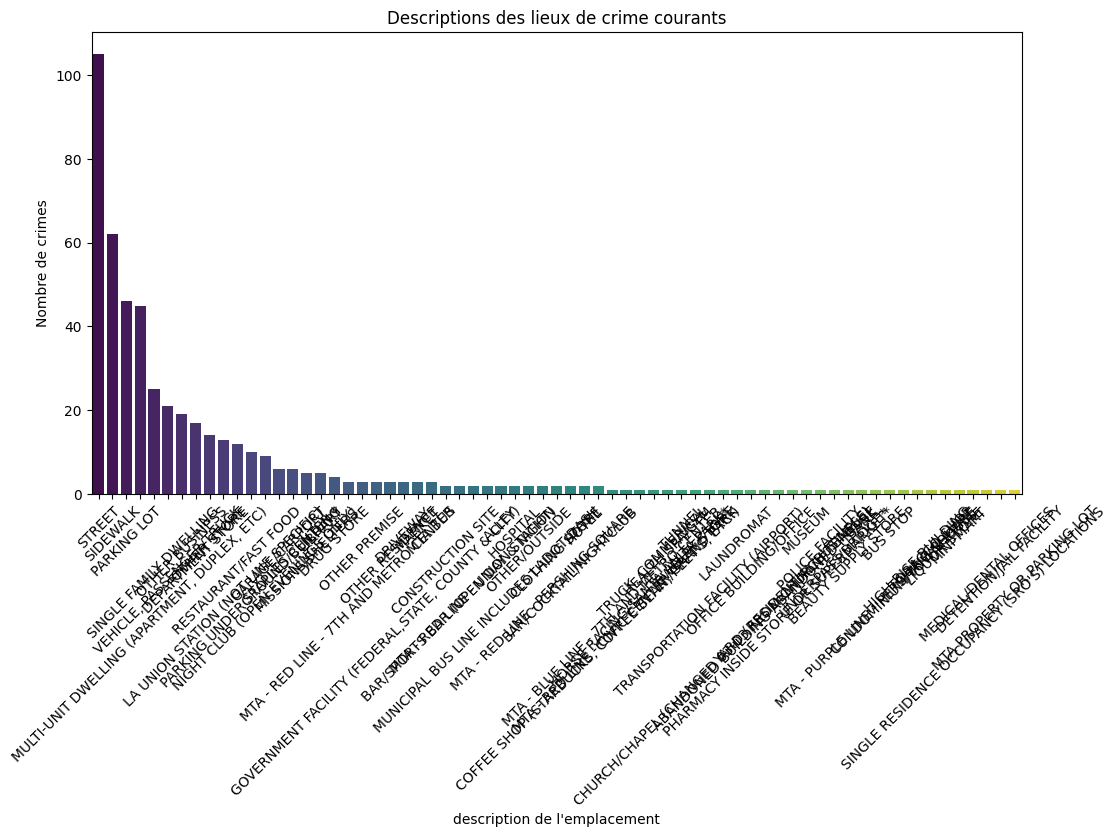

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# compter les occurrences de chaque description locale
premise_counts = df['Premis_Desc'].value_counts()
print(premise_counts)

#Visualisons les descriptions des communes locales
plt.figure(figsize=(12, 6))
sns.barplot(x=premise_counts.index, y=premise_counts.values, palette='viridis')
plt.title('Descriptions des lieux de crime courants')
plt.xlabel('description de l\'emplacement')
plt.ylabel('Nombre de crimes')
plt.xticks(rotation=45)
plt.show()

7 Analyse
- Examiner l’état des crimes signalés.
- Classer les crimes en fonction de leur état actuel.

Status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64


<ipython-input-131-76a1fdc708a1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

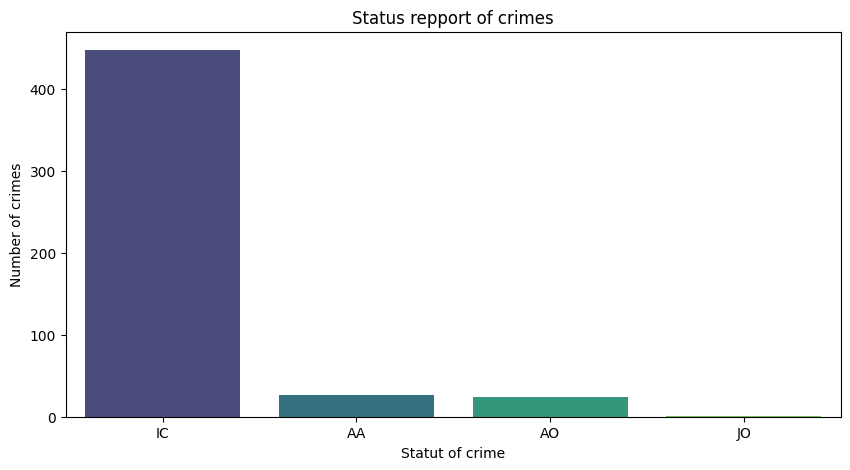

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class CrimeDataAnalyzer:
    def __init__(self, data):
        self.crime_data = pd.DataFrame(data)

    def classify_crimes_by_status(self):
        # Compter les occurrences de chaque statut de crime
        status_counts = self.crime_data['Status'].value_counts()
        return status_counts

    def visualize_crime_status(self):
        status_counts = self.classify_crimes_by_status()
        plt.figure(figsize=(10, 5))
        sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
        plt.title('Status repport of crimes')
        plt.xlabel('Statut of crime')
        plt.ylabel('Number of crimes')
        plt.show()



# Create the instance of class CrimeDataAnalyzer
analyzer = CrimeDataAnalyzer(df)

# Classify the crimes with statut
status_counts = analyzer.classify_crimes_by_status()
print(status_counts)

# Visualize the statuts of repport crime
analyzer.visualize_crime_status()

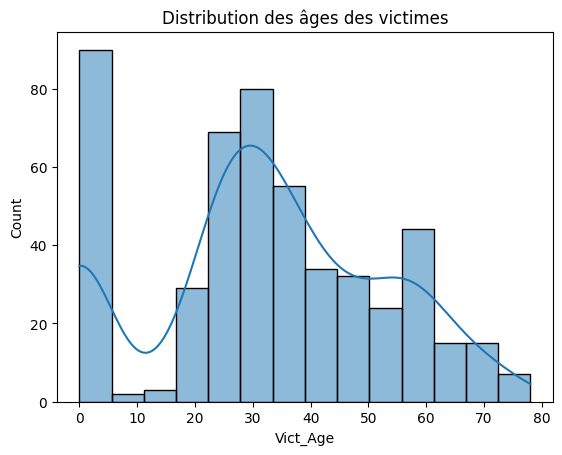

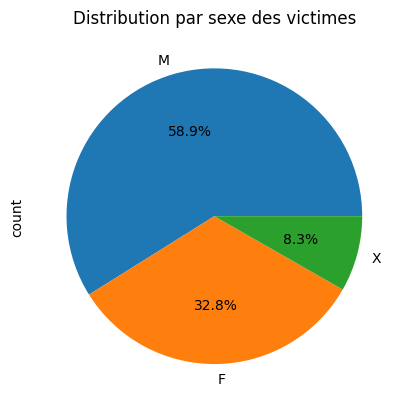

In [134]:
sns.histplot(df['Vict_Age'], kde=True)
plt.title('Distribution des âges des victimes')
plt.show()

df['Vict_Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution par sexe des victimes')
plt.show()